# Detection of peaks in data

> Marcos Duarte  
> [Laboratory of Biomechanics and Motor Control](http://demotu.org/](http://demotu.org/)  
> Federal University of ABC, Brazil

One way to detect peaks (local maxima) or valleys (local minima) in data is to use the property that a peak (or valley) must be greater (or smaller) than its immediate neighbors. The function `detect_peaks.py` from Python module `detecta` detects peaks (or valleys) based on this feature and other characteristics. The function signature is:

```python
ind = detect_peaks(x, mph=None, mpd=1, threshold=0, edge='rising', kpsh=False, valley=False, show=False, ax=None, title=True)
```
The parameters `mph`, `mpd`, and `threshold` follow the convention of the Matlab function `findpeaks.m`.   
Let's see how to use `detect_peaks.py`; first let's import the necessary Python libraries and configure the environment:

## Installation

```bash
pip install detecta
```

Or

```bash
conda install -c duartexyz detecta
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from detecta import detect_peaks

Running the function examples:

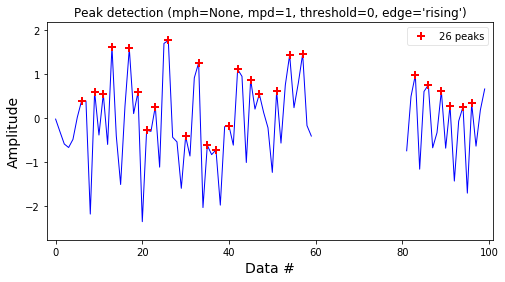

[ 6  9 11 13 17 19 21 23 26 30 33 35 37 40 42 45 47 51 54 57 83 86 89 91
 94 96]


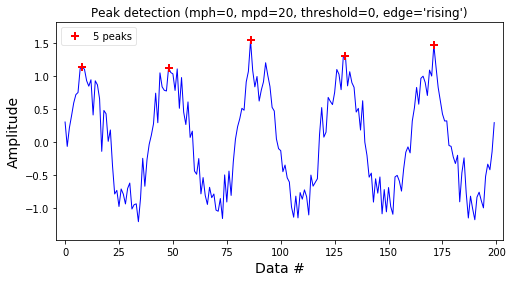

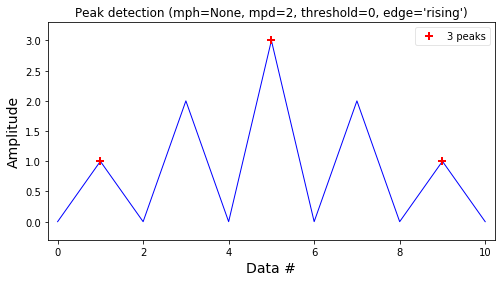

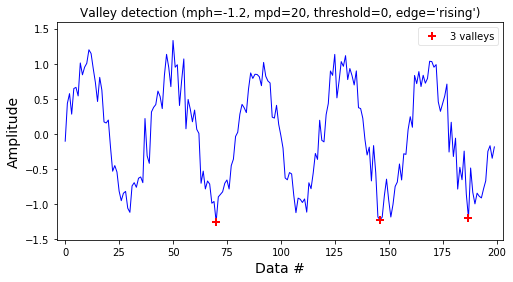

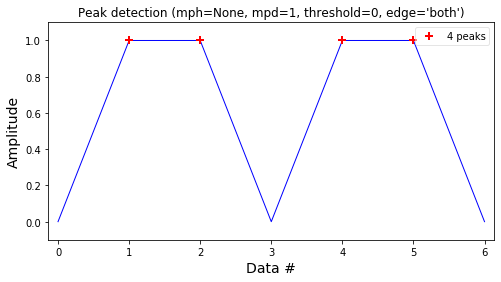

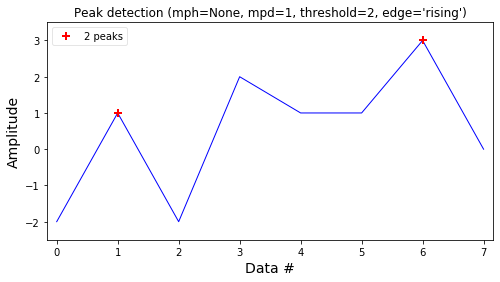

array([1, 6])

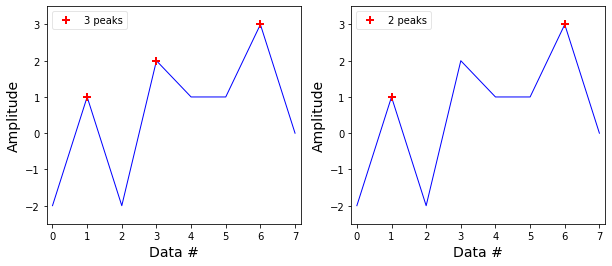

In [3]:
    >>> x = np.random.randn(100)
    >>> x[60:81] = np.nan
    >>> # detect all peaks and plot data
    >>> ind = detect_peaks(x, show=True)
    >>> print(ind)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # set minimum peak height = 0 and minimum peak distance = 20
    >>> detect_peaks(x, mph=0, mpd=20, show=True)

    >>> x = [0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0]
    >>> # set minimum peak distance = 2
    >>> detect_peaks(x, mpd=2, show=True)

    >>> x = np.sin(2*np.pi*5*np.linspace(0, 1, 200)) + np.random.randn(200)/5
    >>> # detection of valleys instead of peaks
    >>> detect_peaks(x, mph=-1.2, mpd=20, valley=True, show=True)

    >>> x = [0, 1, 1, 0, 1, 1, 0]
    >>> # detect both edges
    >>> detect_peaks(x, edge='both', show=True)

    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> # set threshold = 2
    >>> detect_peaks(x, threshold = 2, show=True)
     
    >>> x = [-2, 1, -2, 2, 1, 1, 3, 0]
    >>> fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    >>> detect_peaks(x, show=True, ax=axs[0], threshold=0.5, title=False)
    >>> detect_peaks(x, show=True, ax=axs[1], threshold=1.5, title=False)

## Function performance

The function `detect_peaks.py` is relatively fast but the parameter minimum peak distance (mpd) slows down the function if the data has several peaks (>1000). Try to decrease the number of peaks by tuning the other parameters or smooth the data before calling this function with several peaks in the data.  
Here is a simple test of its performance:

In [4]:
x = np.random.randn(10000)
ind = detect_peaks(x)
print('Data with %d points and %d peaks\n' %(x.size, ind.size))
print('Performance (without the minimum peak distance parameter):')
print('detect_peaks(x)')
%timeit detect_peaks(x)
print('\nPerformance (using the minimum peak distance parameter):')
print('detect_peaks(x, mpd=10)')
%timeit detect_peaks(x, mpd=10)

Data with 10000 points and 3358 peaks

Performance (without the minimum peak distance parameter):
detect_peaks(x)
98.2 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Performance (using the minimum peak distance parameter):
detect_peaks(x, mpd=10)
8.17 ms ± 105 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
